# Previs√£o de Churn no Servi√ßo de Cart√£o de Cr√©dito de um Banco

Neste projeto, o objetivo √© construir um <b>modelo de aprendizado de m√°quina</b> para prever a probabilidade de churn dos clientes no servi√ßo de cart√£o de cr√©dito de um banco. O modelo utilizar√° <b>aprendizado supervisionado</b>, com um conjunto de dados rotulado, onde o <b>alvo</b> ser√° <b>1</b> caso o cliente tenha cancelado o servi√ßo (churn), e <b>0</b> caso contr√°rio.

A abordagem seguir√° um <b>fluxo de trabalho estruturado baseado no modelo CRISP-DM</b>, que inclui as seguintes etapas:

1. **Definir o problema de neg√≥cios.**
2. **Coletar e explorar os dados.**
3. **Dividir os dados em conjuntos de treinamento e teste.**
4. **Realizar an√°lise explorat√≥ria de dados (EDA).**
5. **Engenharia de caracter√≠sticas, limpeza e pr√©-processamento dos dados.**
6. **Treinamento do modelo, compara√ß√£o, sele√ß√£o de caracter√≠sticas e ajuste.**
7. **Testes finais do modelo e avalia√ß√£o.**
8. **Conclus√µes e interpreta√ß√£o dos resultados.**
9. **Implanta√ß√£o do modelo.**

Neste <b>notebook</b>, vamos focar na <b>an√°lise explorat√≥ria de dados (EDA)</b>, abordando as etapas 1 a 4 do fluxo de trabalho. O principal <b>objetivo</b> √© obter <b>insights valiosos sobre os padr√µes de churn</b> com base nas caracter√≠sticas dispon√≠veis. Esses insights ajudar√£o a entender melhor os fatores que contribuem para a sa√≠da dos clientes, antes mesmo de construir um modelo preditivo. Al√©m disso, explicarei detalhadamente as escolhas feitas durante o processo.

---

## 1. Problema de Neg√≥cios

Um <b>gerente</b> de um banco est√° preocupado com o crescente n√∫mero de <b>clientes que est√£o deixando os servi√ßos de cart√£o de cr√©dito</b>. A alta taxa de churn tem impactado negativamente nos resultados da institui√ß√£o. O banco busca uma solu√ß√£o para <b>prever a probabilidade de um cliente cancelar o servi√ßo</b>, de modo que possam atuar de forma proativa para <b>melhorar a reten√ß√£o e reduzir a perda de clientes.</b>

### 1.1 Contexto

Quando um banco adquire um novo cliente para seu servi√ßo de cart√£o de cr√©dito, tr√™s <b>Indicadores-chave de Desempenho (KPIs)</b> s√£o essenciais para medir o sucesso do neg√≥cio:

- **1. Custo de Aquisi√ß√£o de Cliente (CAC):** Mede o custo total para adquirir cada novo cliente, incluindo despesas com marketing, vendas e outras a√ß√µes. Um CAC mais baixo indica uma aquisi√ß√£o mais eficiente.
  
- **2. Valor do Tempo de Vida do Cliente (CLV):** Estima o valor total que o banco espera gerar de um cliente ao longo do seu relacionamento com o banco. Um CLV mais alto significa que o cliente trar√° mais retorno financeiro ao longo do tempo.

- **3. Taxa de Churn:** A taxa de churn √© a porcentagem de clientes que abandonam o servi√ßo durante um per√≠odo espec√≠fico. Esse indicador √© fundamental para avaliar a reten√ß√£o de clientes.

Esses KPIs ajudam o banco a avaliar a efic√°cia de suas estrat√©gias de aquisi√ß√£o de clientes e a prever o impacto financeiro das a√ß√µes tomadas. O objetivo √© <b>minimizar o CAC e o churn, enquanto maximiza o CLV.</b>

### 1.2 Objetivos do Projeto

- **1. Identificar os fatores associados ao churn dos clientes.**
- **2. Desenvolver um modelo preditivo para calcular a probabilidade de churn de cada cliente.**
- **3. Fornecer recomenda√ß√µes pr√°ticas para o banco reduzir a taxa de churn dos clientes.**

### 1.3 Por que usar a abordagem de probabilidade?

A principal vantagem de prever a <b>probabilidade de churn</b> em vez de apenas classificar os clientes como "churned" ou "n√£o churned" √© a possibilidade de obter informa√ß√µes mais detalhadas. Ao gerar uma pontua√ß√£o de probabilidade, o banco pode tomar decis√µes mais informadas, como concentrar seus esfor√ßos de reten√ß√£o em clientes com maior risco de cancelar o servi√ßo. Esse tipo de abordagem permite que o banco <b>personalize suas estrat√©gias de reten√ß√£o</b> e aloque recursos de maneira mais eficaz.

### 1.4 Quais os benef√≠cios dessa abordagem?

- **1. Economia de custos:** Ao focar nos clientes com maior risco de churn, o banco pode otimizar seus esfor√ßos de reten√ß√£o e reduzir gastos desnecess√°rios.
- **2. Melhora na reten√ß√£o de clientes:** Com um modelo preditivo, √© poss√≠vel atuar antes que o cliente decida cancelar, oferecendo ofertas ou melhorias personalizadas.
- **3. Melhor experi√™ncia do cliente:** O banco pode oferecer servi√ßos mais adequados √†s necessidades de cada cliente, aumentando a satisfa√ß√£o e a lealdade.
- **4. Marketing direcionado:** O modelo permite uma segmenta√ß√£o mais precisa das campanhas de marketing, alcan√ßando apenas os clientes que realmente precisam de aten√ß√£o.
- **5. Prote√ß√£o da receita:** A redu√ß√£o do churn ajuda a preservar a receita proveniente dos clientes existentes, o que √© crucial para o crescimento financeiro do banco.

Com a implementa√ß√£o dessa solu√ß√£o, espera-se que o <b>problema de churn seja significativamente mitigado</b>, resultando em uma maior reten√ß√£o de clientes e em um impacto positivo nos KPIs financeiros do banco.

### Importing the libraries

In [1]:
# Manipula√ß√£o de dados e visualiza√ß√£o.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import os

# Statistical analysis
from scipy import stats

# Dividir os dados.
from sklearn.model_selection import train_test_split


# Filtrar avisos.
import warnings
warnings.filterwarnings('ignore')

### Configura√ß√µes de Visualiza√ß√£o
%matplotlib inline


# 2. Compreendendo os Dados

- Ele cont√©m dados de clientes de cart√£o de cr√©dito, com informa√ß√µes demogr√°ficas, financeiras e sobre os produtos. O conjunto j√° est√° rotulado, com os clientes que desistiram identificados como 1 e os que n√£o desistiram identificados como 0 na vari√°vel de flag de atrito (attrition flag).
- Inicialmente, irei remover duas vari√°veis, pois n√£o tenho acesso ao significado delas, e elas parecem ser resultados de um modelo de aprendizado de m√°quina Naive Bayes.

In [2]:


def informacoes_dados(df):
    """
    Cria um DataFrame resumo contendo informa√ß√µes sobre cada coluna do DataFrame de entrada.
    
    Par√¢metros:
        df (pandas.DataFrame): DataFrame de entrada a ser analisado.
        
    Retorna:
        pandas.DataFrame: Um DataFrame com as seguintes colunas:
            - tipos_dados: Tipo de dado de cada coluna.
            - Valores ausentes: N√∫mero de valores ausentes em cada coluna.
            - √önicos: N√∫mero de valores √∫nicos em cada coluna.
            - Exemplo: Primeiro valor de cada coluna.
            - Entropia: Entropia de Shannon das distribui√ß√µes de valores (em bits).
            
    Observa√ß√µes:
        - Exibe o formato (shape) do DataFrame de entrada.
        - A entropia √© calculada usando scipy.stats.entropy com base 2.
        - Valores de entropia mais altos indicam distribui√ß√µes mais uniformes.
    """
    info = pd.DataFrame({
        'tipos_dados': df.dtypes,
        'Valores ausentes': df.isna().sum(),
        '√önicos': df.nunique(),
        'Exemplo': df.iloc[0],
        'Entropia': [round(stats.entropy(df[col].value_counts(normalize=True), base=2), 2) 
                     for col in df.columns]
    })
    
    print(f"Formato do conjunto de dados: Linhas: {df.shape[0]}; Colunas: {df.shape[1]}.")
    print(f'Quantidade de valores duplicados: {df.duplicated().sum()}.')
    return info


In [2]:
data_path = 'input/BankChurners.csv'
df = pd.read_csv(data_path)

df = df.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])
df.head(2)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1              44  ...                       1                      2   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  

[2 rows x 21 columns]

### Dicion√°rio de Dados

**1. CLIENTNUM:** N√∫mero do cliente. Identificador √∫nico do titular da conta. Categ√≥rico nominal.  
**2. Attrition_Flag:** Vari√°vel de evento interno (atividade do cliente) ‚Äì se a conta foi fechada, ent√£o 1; caso contr√°rio, 0. Categ√≥rico bin√°rio.  
**3. Customer_Age:** Vari√°vel demogr√°fica ‚Äì Idade do cliente em anos. Num√©rico discreto.  
**4. Gender:** Vari√°vel demogr√°fica ‚Äì M = Masculino, F = Feminino. Categ√≥rico nominal.  
**5. Dependent_count:** Vari√°vel demogr√°fica ‚Äì N√∫mero de dependentes. Num√©rico discreto.  
**6. Education_Level:** Vari√°vel demogr√°fica ‚Äì Grau de escolaridade do titular da conta (exemplo: ensino m√©dio, gradua√ß√£o, etc.). Categ√≥rico ordinal.  
**7. Marital_Status:** Vari√°vel demogr√°fica ‚Äì Estado civil (Casado, Solteiro, Divorciado, Desconhecido). Categ√≥rico nominal.  
**8. Income_Category:** Vari√°vel demogr√°fica ‚Äì Faixa de renda anual do titular da conta (< $40K, $40K - $60K, $60K - $80K, $80K - $120K, > $120K). Categ√≥rico ordinal.  
**9. Card_Category:** Vari√°vel de produto ‚Äì Tipo de cart√£o (Blue, Silver, Gold, Platinum). Categ√≥rico ordinal.  
**10. Months_on_book:** Tempo de relacionamento com o banco. Num√©rico discreto.  
**11. Total_Relationship_Count:** N√∫mero total de produtos mantidos pelo cliente. Num√©rico discreto.  
**12. Months_Inactive_12_mon:** N√∫mero de meses inativo nos √∫ltimos 12 meses. Num√©rico discreto.  
**13. Contacts_Count_12_mon:** N√∫mero de contatos nos √∫ltimos 12 meses. Num√©rico discreto.  
**14. Credit_Limit:** Limite de cr√©dito no cart√£o de cr√©dito. Num√©rico cont√≠nuo.  
**15. Total_Revolving_Bal:** Saldo rotativo total no cart√£o de cr√©dito. Num√©rico discreto.  
**16. Avg_Open_To_Buy:** Linha de cr√©dito dispon√≠vel para compras (m√©dia dos √∫ltimos 12 meses). Num√©rico cont√≠nuo.  
**17. Total_Amt_Chng_Q4_Q1:** Varia√ß√£o no valor das transa√ß√µes (Q4 em rela√ß√£o ao Q1). Num√©rico cont√≠nuo.  
**18. Total_Trans_Amt:** Valor total das transa√ß√µes (√∫ltimos 12 meses). Num√©rico discreto.  
**19. Total_Trans_Ct:** N√∫mero total de transa√ß√µes (√∫ltimos 12 meses). Num√©rico discreto.  
**20. Total_Ct_Chng_Q4_Q1:** Varia√ß√£o no n√∫mero de transa√ß√µes (Q4 em rela√ß√£o ao Q1). Num√©rico cont√≠nuo.  
**21. Avg_Utilization_Ratio:** M√©dia da taxa de utiliza√ß√£o do cart√£o. Num√©rico cont√≠nuo.  

In [4]:
informacoes_dados(df)

Formato do conjunto de dados: Linhas: 10127; Colunas: 21.
Quantidade de valores duplicados: 0.


tipos_dados  Valores ausentes  √önicos  \
CLIENTNUM                      int64                 0   10127   
Attrition_Flag                object                 0       2   
Customer_Age                   int64                 0      45   
Gender                        object                 0       2   
Dependent_count                int64                 0       6   
Education_Level               object                 0       7   
Marital_Status                object                 0       4   
Income_Category               object                 0       6   
Card_Category                 object                 0       4   
Months_on_book                 int64                 0      44   
Total_Relationship_Count       int64                 0       6   
Months_Inactive_12_mon         int64                 0       7   
Contacts_Count_12_mon          int64                 0       7   
Credit_Limit                 float64                 0    6205   
Total_Revolving_Bal            int64                 0    1974   
Avg_Open_To_Buy              float64                 0    6813   
Total_Amt_Chng_Q4_Q1         float64                 0    1158   
Total_Trans_Amt                int64                 0    5033   
Total_Trans_Ct                 int64                 0     126   
Total_Ct_Chng_Q4_Q1          float64                 0     830   
Avg_Utilization_Ratio        float64                 0     964   

                                    Exemplo  Entropia  
CLIENTNUM                         768805383     13.31  
Attrition_Flag            Existing Customer      0.64  
Customer_Age                             45      5.02  
Gender                                    M      1.00  
Dependent_count                           3      2.38  
Education_Level                 High School      2.55  
Marital_Status                      Married      1.60  
Income_Category                 $60K - $80K      2.40  
Card_Category                          Blue      0.42  
Months_on_book                           39      4.68  
Total_Relationship_Count                  5      2.53  
Months_Inactive_12_mon                    1      1.94  
Contacts_Count_12_mon                     3      2.18  
Credit_Limit                        12691.0     11.71  
Total_Revolving_Bal                     777      8.62  
Avg_Open_To_Buy                     11914.0     12.29  
Total_Amt_Chng_Q4_Q1                  1.335      9.51  
Total_Trans_Amt                        1144     12.02  
Total_Trans_Ct                           42      6.49  
Total_Ct_Chng_Q4_Q1                   1.625      8.84  
Avg_Utilization_Ratio                 0.061      8.07

Descritiva num√©rica:

In [5]:
df.describe().T

count          mean           std          min  \
CLIENTNUM                 10127.0  7.391776e+08  3.690378e+07  708082083.0   
Customer_Age              10127.0  4.632596e+01  8.016814e+00         26.0   
Dependent_count           10127.0  2.346203e+00  1.298908e+00          0.0   
Months_on_book            10127.0  3.592841e+01  7.986416e+00         13.0   
Total_Relationship_Count  10127.0  3.812580e+00  1.554408e+00          1.0   
Months_Inactive_12_mon    10127.0  2.341167e+00  1.010622e+00          0.0   
Contacts_Count_12_mon     10127.0  2.455317e+00  1.106225e+00          0.0   
Credit_Limit              10127.0  8.631954e+03  9.088777e+03       1438.3   
Total_Revolving_Bal       10127.0  1.162814e+03  8.149873e+02          0.0   
Avg_Open_To_Buy           10127.0  7.469140e+03  9.090685e+03          3.0   
Total_Amt_Chng_Q4_Q1      10127.0  7.599407e-01  2.192068e-01          0.0   
Total_Trans_Amt           10127.0  4.404086e+03  3.397129e+03        510.0   
Total_Trans_Ct            10127.0  6.485869e+01  2.347257e+01         10.0   
Total_Ct_Chng_Q4_Q1       10127.0  7.122224e-01  2.380861e-01          0.0   
Avg_Utilization_Ratio     10127.0  2.748936e-01  2.756915e-01          0.0   

                                   25%           50%           75%  \
CLIENTNUM                 7.130368e+08  7.179264e+08  7.731435e+08   
Customer_Age              4.100000e+01  4.600000e+01  5.200000e+01   
Dependent_count           1.000000e+00  2.000000e+00  3.000000e+00   
Months_on_book            3.100000e+01  3.600000e+01  4.000000e+01   
Total_Relationship_Count  3.000000e+00  4.000000e+00  5.000000e+00   
Months_Inactive_12_mon    2.000000e+00  2.000000e+00  3.000000e+00   
Contacts_Count_12_mon     2.000000e+00  2.000000e+00  3.000000e+00   
Credit_Limit              2.555000e+03  4.549000e+03  1.106750e+04   
Total_Revolving_Bal       3.590000e+02  1.276000e+03  1.784000e+03   
Avg_Open_To_Buy           1.324500e+03  3.474000e+03  9.859000e+03   
Total_Amt_Chng_Q4_Q1      6.310000e-01  7.360000e-01  8.590000e-01   
Total_Trans_Amt           2.155500e+03  3.899000e+03  4.741000e+03   
Total_Trans_Ct            4.500000e+01  6.700000e+01  8.100000e+01   
Total_Ct_Chng_Q4_Q1       5.820000e-01  7.020000e-01  8.180000e-01   
Avg_Utilization_Ratio     2.300000e-02  1.760000e-01  5.030000e-01   

                                   max  
CLIENTNUM                 8.283431e+08  
Customer_Age              7.300000e+01  
Dependent_count           5.000000e+00  
Months_on_book            5.600000e+01  
Total_Relationship_Count  6.000000e+00  
Months_Inactive_12_mon    6.000000e+00  
Contacts_Count_12_mon     6.000000e+00  
Credit_Limit              3.451600e+04  
Total_Revolving_Bal       2.517000e+03  
Avg_Open_To_Buy           3.451600e+04  
Total_Amt_Chng_Q4_Q1      3.397000e+00  
Total_Trans_Amt           1.848400e+04  
Total_Trans_Ct            1.390000e+02  
Total_Ct_Chng_Q4_Q1       3.714000e+00  
Avg_Utilization_Ratio     9.990000e-01

### Algumas percep√ß√µes:  
1. A idade m√©dia dos clientes √© aproximadamente **46 anos**. Metade dos clientes tem entre **41 e 52 anos**, indicando um perfil mais velho.  
2. Em m√©dia, os clientes possuem **aproximadamente 4 produtos** do banco.  
3. **75% dos clientes ficaram inativos por pelo menos 2 meses nos √∫ltimos 12 meses**. Esse √© um indicador ruim. O banco deve planejar estrat√©gias para aumentar o consumo de seus clientes.  
4. **75% dos clientes entraram em contato com o banco pelo menos 2 vezes nos √∫ltimos 12 meses**. Isso tamb√©m √© preocupante, pois algo no produto de cart√£o de cr√©dito est√° levando os clientes a procurarem a empresa, possivelmente devido √† insatisfa√ß√£o.  
5. O **limite de cr√©dito m√©dio √© de 8.632**. Al√©m disso, parece estar **distorcido para a direita** (a m√©dia √© maior que a mediana, com limite m√≠nimo de 1.438 e m√°ximo de 34.516).  
6. A **taxa m√©dia de utiliza√ß√£o do cr√©dito √© de cerca de 28%**, um valor baixo. Al√©m disso, metade dos clientes apresenta uma taxa de utiliza√ß√£o de **at√© 17,6%**. O banco deve prestar aten√ß√£o a isso e buscar estrat√©gias para aumentar o uso do servi√ßo de cart√£o de cr√©dito.  
7. Em m√©dia, os clientes realizaram aproximadamente **65 transa√ß√µes nos √∫ltimos 12 meses**, o que equivale a **cerca de 5,4 transa√ß√µes por m√™s**, um n√∫mero muito baixo.  
8. Observando os valores m√≠nimos e m√°ximos, **n√£o parecem haver valores inconsistentes**.
9. **N√£o h√° valores ausentes** no conjunto de dados.
10. **N√£o h√° valores duplicados** no conjunto de dados.

- Vou remover a vari√°vel **CLIENTNUM**, pois ela possui um valor √∫nico para cada registro e n√£o √© √∫til para a an√°lise.  
- Vou **renomear as colunas para um formato padr√£o**, facilitando a manipula√ß√£o dos dados. Al√©m disso, a vari√°vel **Attrition_Flag ser√° renomeada para Churn_Flag**, tornando a interpreta√ß√£o mais clara.  
- Vou expressar as vari√°veis **Gender e Attrition_Flag** como **bin√°rias**, o que facilitar√° a An√°lise Explorat√≥ria de Dados (EDA), especialmente na visualiza√ß√£o de valores percentuais.

In [3]:
# Mapeamentos em um dicion√°rio
mappings = {
    'gender': {'M': 1, 'F': 0},
    'attrition_flag': {'Attrited Customer': 1, 'Existing Customer': 0}
}

# Aplicar todas as transforma√ß√µes em sequ√™ncia
df = (df
      .drop(columns=['CLIENTNUM'])
      .rename(columns=str.lower)
      .replace(mappings)
      .rename(columns={'attrition_flag': 'churn_flag'})
)

### 3. Divis√£o dos dados em conjuntos de treino e teste  

- Primeiramente, vou dividir os dados em **conjuntos de treino e teste**.  
- O **conjunto de teste** deve conter dados que o modelo **nunca viu antes**.  
- A **An√°lise Explorat√≥ria de Dados (EDA)** ser√° realizada **apenas no conjunto de treino**, para evitar **vazamento de dados**, garantir uma **representa√ß√£o realista** e permitir uma **avalia√ß√£o correta do modelo** com novos dados desconhecidos.  
- Vou especificar `stratify=y` na fun√ß√£o `train_test_split`, garantindo que a divis√£o mantenha a **mesma propor√ß√£o de cada classe-alvo** nos conjuntos de treino e teste. Isso √© especialmente √∫til para **datasets desbalanceados**, como √© o caso, j√° que h√° **mais clientes ativos do que inativos**.

In [5]:
X = df.drop(columns=['churn_flag'])
y = df['churn_flag'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


# Criar a pasta de sa√≠da se n√£o existir
output_dir = 'output'
os.makedirs(output_dir, exist_ok=True)

# Salvar os conjuntos de dados de treino e teste
X_train.to_csv(os.path.join(output_dir, 'X_train.csv'), index=False)
X_test.to_csv(os.path.join(output_dir, 'X_test.csv'), index=False)
y_train.to_csv(os.path.join(output_dir, 'y_train.csv'), index=False)
y_test.to_csv(os.path.join(output_dir, 'y_test.csv'), index=False)

#exibindo as dimens√µes dos conjuntos de dados
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((8101, 19), (2026, 19), (8101,), (2026,))

In [8]:
#propor√ß√£o dos conjuntos de dados de treino e teste
print(f'{y_train.value_counts(normalize=True)}')

print(f'{y_test.value_counts(normalize=True)}')

churn_flag
0    0.839279
1    0.160721
Name: proportion, dtype: float64
churn_flag
0    0.839585
1    0.160415
Name: proportion, dtype: float64


### 4. An√°lise Explorat√≥ria de Dados (EDA)  

Vou explorar o **conjunto de treino** para obter uma melhor compreens√£o de:  
- Como as vari√°veis est√£o **individualmente distribu√≠das**;  
- **Rela√ß√µes entre as vari√°veis**;  
- **Correla√ß√µes, tend√™ncias e poss√≠veis insights** a partir dos dados, especialmente em rela√ß√£o √† **vari√°vel-alvo (churn_flag)**.  

Para isso, realizarei **an√°lises univariada, bivariada e multivariada**:  
- **Univariada:** Distribui√ß√£o de cada vari√°vel individualmente.  
- **Bivariada:** Rela√ß√µes entre a vari√°vel-alvo e outras vari√°veis.  
- **Multivariada:** Intera√ß√£o entre m√∫ltiplas vari√°veis.  

Utilizarei **todo o conjunto de treino** (com preditores e vari√°vel-alvo) para aproveitar o **par√¢metro ‚Äòhue‚Äô do Seaborn** nas visualiza√ß√µes e analisar a **matriz de correla√ß√£o**.

In [6]:
#unindo os conjuntos de dados de treino
train = pd.concat([X_train, y_train], axis=1)
train.columns


Index(['customer_age', 'gender', 'dependent_count', 'education_level',
       'marital_status', 'income_category', 'card_category', 'months_on_book',
       'total_relationship_count', 'months_inactive_12_mon',
       'contacts_count_12_mon', 'credit_limit', 'total_revolving_bal',
       'avg_open_to_buy', 'total_amt_chng_q4_q1', 'total_trans_amt',
       'total_trans_ct', 'total_ct_chng_q4_q1', 'avg_utilization_ratio',
       'churn_flag'],
      dtype='object')

Separando as vari√°veis num√©ricas e categoricas, para facilitar a an√°lise explorat√≥ria de dados.

In [7]:
variaveis_numericas = X_train.select_dtypes('number').columns.tolist()
variaveis_categoricas = X_train.select_dtypes('object').columns.tolist()
alvo = 'churn_flag'

print(f'Existem {len(variaveis_numericas)} vari√°veis num√©ricas. S√£o elas: ')
print(variaveis_numericas)
print(f'\nExistem {len(variaveis_categoricas)} vari√°veis categ√≥ricas. S√£o elas: ')
print(variaveis_categoricas)
print(f'\nA vari√°vel-alvo √©: {alvo}.')


Existem 15 vari√°veis num√©ricas. S√£o elas: 
['customer_age', 'gender', 'dependent_count', 'months_on_book', 'total_relationship_count', 'months_inactive_12_mon', 'contacts_count_12_mon', 'credit_limit', 'total_revolving_bal', 'avg_open_to_buy', 'total_amt_chng_q4_q1', 'total_trans_amt', 'total_trans_ct', 'total_ct_chng_q4_q1', 'avg_utilization_ratio']

Existem 4 vari√°veis categ√≥ricas. S√£o elas: 
['education_level', 'marital_status', 'income_category', 'card_category']

A vari√°vel-alvo √©: churn_flag.


Verificando valores √∫nicos nas vari√°veis categ√≥ricas.

In [11]:
for x in variaveis_categoricas:
    print(x)
    print('-'*40)
    print(f'Existem {train[x].nunique()} valores √∫nicos. S√£o eles: ')
    print(train[x].value_counts(normalize=True).round(2))
    print('\n')


education_level
----------------------------------------
Existem 7 valores √∫nicos. S√£o eles: 
education_level
Graduate         0.31
High School      0.20
Unknown          0.15
Uneducated       0.15
College          0.10
Post-Graduate    0.05
Doctorate        0.04
Name: proportion, dtype: float64


marital_status
----------------------------------------
Existem 4 valores √∫nicos. S√£o eles: 
marital_status
Married     0.46
Single      0.39
Unknown     0.07
Divorced    0.07
Name: proportion, dtype: float64


income_category
----------------------------------------
Existem 6 valores √∫nicos. S√£o eles: 
income_category
Less than $40K    0.35
$40K - $60K       0.18
$80K - $120K      0.15
$60K - $80K       0.14
Unknown           0.11
$120K +           0.07
Name: proportion, dtype: float64


card_category
----------------------------------------
Existem 4 valores √∫nicos. S√£o eles: 
card_category
Blue        0.93
Silver      0.05
Gold        0.01
Platinum    0.00
Name: proportion, dtype: 

- As vari√°veis **education_level, income_category e card_category** apresentam uma **rela√ß√£o ordinal**. Portanto, o uso do **OrdinalEncoder** pode ser uma boa op√ß√£o para codific√°-las.  
- Com exce√ß√£o de **card_category**, todas as vari√°veis categ√≥ricas possuem uma categoria **"unknown"**. Vou investigar a **distribui√ß√£o de churn dentro dessa categoria** e decidir como lidar com ela.  
  - Se **"unknown" apresentar um padr√£o de churn distinto**, ser√° uma boa pr√°tica mant√™-lo como uma categoria v√°lida.  
  - **Remover ou imputar esses valores poderia introduzir vi√©s e perda de informa√ß√£o**, pois o padr√£o de churn pode **n√£o ser aleat√≥rio** dentro desse grupo e ajudar o modelo a distinguir entre clientes que mant√™m ou cancelam suas contas.  

### An√°lise Univariada  
Agora, realizarei uma **an√°lise univariada** para observar os valores t√≠picos de cada vari√°vel dos clientes do banco.  

### Distribui√ß√£o da Vari√°vel-Alvo  
Vou analisar a distribui√ß√£o da vari√°vel **churn_flag** para entender a propor√ß√£o de clientes ativos e inativos.

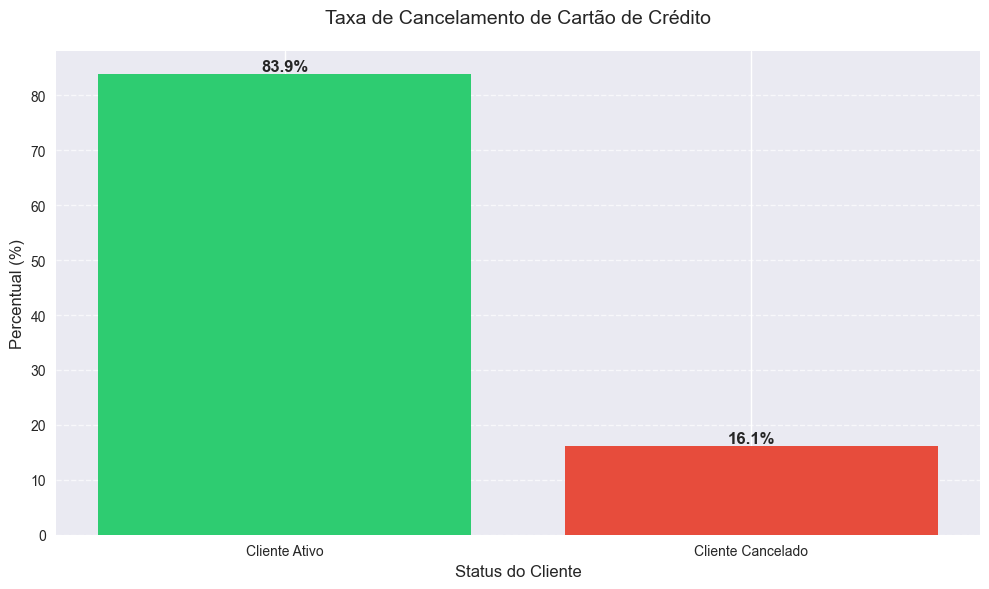

In [12]:
# Agrupa os dados por flag de churn e calcula percentuais
df_churn = (train.groupby('churn_flag')
            .size()
            .reset_index(name='total')
            .assign(percentual=lambda x: (x['total'] / x['total'].sum()) * 100)
            .sort_values('percentual'))

# Configura√ß√£o do plot
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(10, 6))

# Cria√ß√£o do gr√°fico de barras
cores = ['#e74c3c','#2ecc71']  # Verde para n√£o-churn, vermelho para churn
barras = ax.bar(df_churn['churn_flag'], 
                df_churn['percentual'],
                color=cores)

# Personaliza√ß√£o do gr√°fico
ax.set_title('Taxa de Cancelamento de Cart√£o de Cr√©dito', 
             fontsize=14, 
             pad=20)
ax.set_xlabel('Status do Cliente', fontsize=12)
ax.set_ylabel('Percentual (%)', fontsize=12)

# Configura√ß√£o dos eixos
ax.set_xticks([0, 1])
ax.set_xticklabels(['Cliente Ativo', 'Cliente Cancelado'], 
                   fontsize=10)

# Adiciona grid suave no eixo y
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# Adiciona valores nas barras
for barra in barras:
    altura = barra.get_height()
    ax.text(barra.get_x() + barra.get_width()/2,
            altura,
            f'{altura:.1f}%',
            ha='center',
            va='bottom',
            fontsize=12,
            fontweight='bold')

# Ajusta o layout
plt.tight_layout()

# Remove bordas desnecess√°rias
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

A vari√°vel-alvo est√° **desbalanceada**: **16,1% dos clientes s√£o churners**. Para lidar com isso, adotarei as seguintes estrat√©gias:  

- **Hold-out estratificado e valida√ß√£o cruzada k-fold estratificada**:  
  - Manterei a propor√ß√£o da vari√°vel-alvo nos conjuntos de **teste e valida√ß√£o**, inclusive durante o ajuste de hiperpar√¢metros.  

- **Defini√ß√£o de pesos diferentes para as classes majorit√°ria e minorit√°ria**:  
  - Atribuirei **pesos mais altos para a classe minorit√°ria** (churners).  
  - Dessa forma, o modelo ser√° **penalizado** ao classificar erroneamente um cliente que cancelou a conta.  
  - Esses pesos ser√£o configurados no hiperpar√¢metro espec√≠fico do modelo.  

- **An√°lise do trade-off entre precis√£o e recall** (se necess√°rio):  
  - O objetivo principal √© **prever probabilidades de churn**, e n√£o apenas classifica√ß√µes bin√°rias.  
  - Isso permitir√° que o banco **tome decis√µes mais informadas**.  
  - Em vez de apenas prever se um cliente ir√° cancelar ou n√£o, o banco poder√° verificar **a probabilidade de churn** e agir preventivamente.  

### Distribui√ß√£o das Vari√°veis Num√©ricas  
Agora, analisarei as **distribui√ß√µes das vari√°veis num√©ricas** para verificar:  
- **Assimetria nas distribui√ß√µes**;  
- **Valores mais comuns entre os clientes do banco**.

In [9]:
def plotar_analise(dados, caracteristicas, hue=None, figsize=(24, 20)):
    """
    Fun√ß√£o para criar histogramas das caracter√≠sticas num√©ricas.
    
    Par√¢metros:
    - dados: DataFrame contendo os dados a serem plotados
    - caracteristicas: Lista com os nomes das caracter√≠sticas
    - hue: Nome da coluna para colorir o histograma (opcional)
    - figsize: Tupla indicando o tamanho da figura
    """
    # Dicion√°rio para tradu√ß√£o dos nomes das caracter√≠sticas
    traducoes = {
        'customer_age': 'Idade do Cliente',
        'months_on_book': 'Meses como Cliente',
        'credit_limit': 'Limite de Cr√©dito',
        'total_revolving_bal': 'Saldo Rotativo Total',
        'avg_open_to_buy': 'M√©dia Dispon√≠vel para Compra',
        'total_amt_chng_q4_q1': 'Varia√ß√£o Total Valor (Q4-Q1)',
        'total_trans_amt': 'Valor Total de Transa√ß√µes',
        'total_trans_ct': 'Quantidade Total de Transa√ß√µes',
        'total_ct_chng_q4_q1': 'Varia√ß√£o Total Quantidade (Q4-Q1)',
        'avg_utilization_ratio': 'Taxa M√©dia de Utiliza√ß√£o',
        'total_relationship_count': 'Total de Produtos'
    }
    
    # Configura√ß√µes de estilo
    plt.style.use('seaborn')
    fig = plt.figure(figsize=figsize)
    
    # Paleta de cores personalizada
    cores = ['#2ecc71', '#e74c3c'] if hue else 'brown'
    
    for i, caracteristica in enumerate(caracteristicas):
        plt.subplot(len(caracteristicas) // 3 + 1, 3, i + 1)
        
        # Criar histograma com KDE
        sns.histplot(
            data=dados,
            x=caracteristica,
            hue=hue,
            kde=True,
            palette=cores if hue else cores,
            alpha=0.6,
            multiple="layer" if hue else "layer"
        )
        
        # Personalizar o gr√°fico
        plt.title(traducoes[caracteristica], fontsize=12, pad=10)
        plt.xlabel('Valor', fontsize=10)
        plt.ylabel('Frequ√™ncia', fontsize=10)
        plt.grid(True, alpha=0.3)
        
        # Ajustar a legenda se houver hue
        if hue:
            plt.legend(title='Status do Cliente',
                      labels=['Ativo', 'Cancelado'],
                      bbox_to_anchor=(1.05, 1),
                      loc='upper left')
        
        # Remover bordas superiores e direitas
        plt.gca().spines['top'].set_visible(False)
        plt.gca().spines['right'].set_visible(False)
    
    plt.tight_layout()
    plt.show()



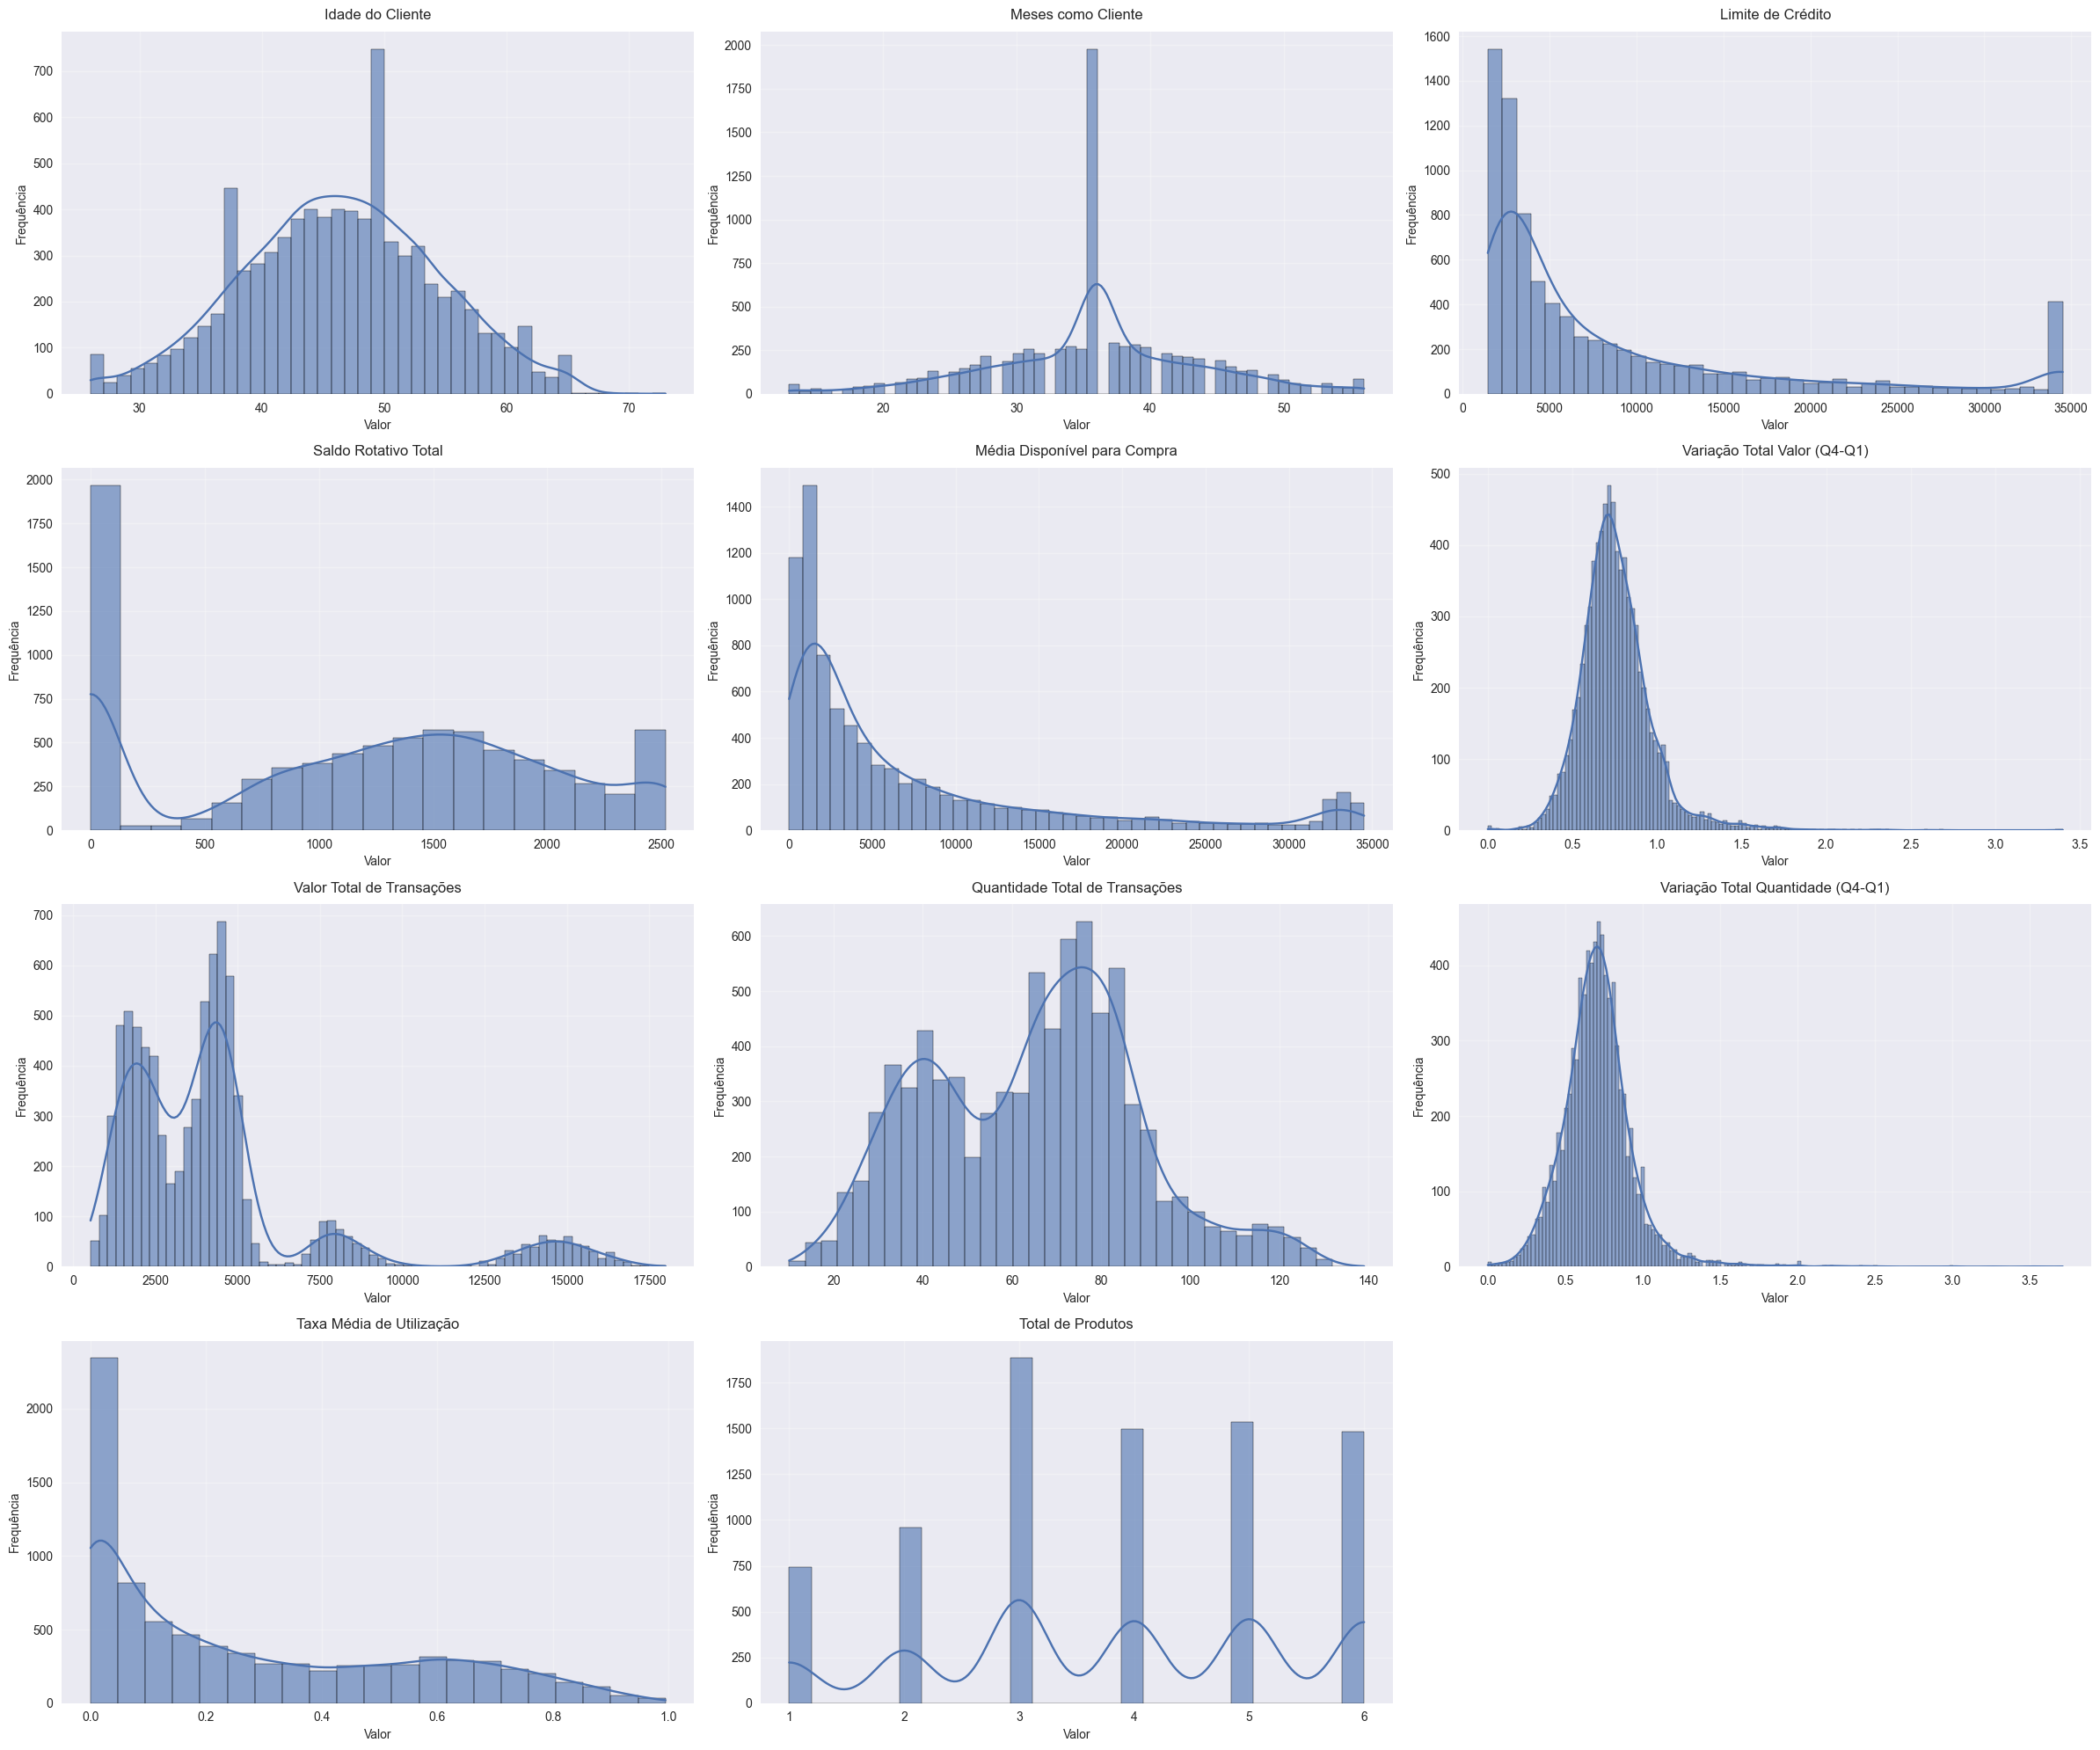

In [14]:
# Lista de caracter√≠sticas para an√°lise
categoria_numericas = [
    'customer_age',
    'months_on_book',
    'credit_limit',
    'total_revolving_bal',
    'avg_open_to_buy',
    'total_amt_chng_q4_q1',
    'total_trans_amt',
    'total_trans_ct',
    'total_ct_chng_q4_q1',
    'avg_utilization_ratio',
    'total_relationship_count'
]

# Criar os gr√°ficos
plotar_analise(dados=train, caracteristicas=categoria_numericas)

### **Insights:**  

- **Idade:** A maioria dos clientes tem entre **40 e 50 anos**.  
- **Tempo de relacionamento:** Grande parte dos clientes utiliza o cart√£o de cr√©dito do banco h√° **36 meses**.  
- **Limite de cr√©dito:**  
  - A distribui√ß√£o √© **assim√©trica √† direita** (right-skewed).  
  - Isso indica que a maioria dos clientes tem **limites de cr√©dito baixos**, enquanto **poucos possuem limites altos**.  
  - Cerca de **5% dos clientes possuem limites elevados**, em torno de **35.000**.  
  - **Avg_Open_To_Buy e Avg_Utilization_Ratio** tamb√©m apresentam assimetria positiva.  

- **Taxa m√©dia de utiliza√ß√£o:**  
  - A **distribui√ß√£o √© assim√©trica √† direita**, indicando que **a maioria dos clientes utiliza pouco o servi√ßo**.  
  - **Cerca de 25% dos clientes apresentam uma taxa de utiliza√ß√£o igual a zero**.  
  - O banco deve **planejar estrat√©gias para aumentar a utiliza√ß√£o** e, consequentemente, **a receita**.  

- **Total Revolving Balance:**  
  - **25% dos clientes apresentam saldo revolvente total igual a zero**.  
  - Saldo revolvente baixo (especialmente zero) pode indicar **alta probabilidade de churn**.  
  - Como **Avg_Utilization_Ratio e Total_Revolving_Balance possuem a mesma propor√ß√£o de registros zerados**, essas vari√°veis podem estar **correlacionadas** (a ser investigado posteriormente).  

- **Contagem e valor total de transa√ß√µes:**  
  - As distribui√ß√µes apresentam **dois picos**.  
  - Isso sugere que h√° uma **diferen√ßa entre clientes que cancelaram e os que permaneceram**.  
  - Investigarei essa rela√ß√£o mais a fundo.  
  - Muitos clientes realizaram **cerca de 80 ou 40 transa√ß√µes** no √∫ltimo ano.  
  - Valores de transa√ß√£o em torno de **5.000 e 2.500** s√£o comuns.  

- **N√∫mero de produtos do banco:**  
  - Cerca de **80% dos clientes possuem pelo menos 3 produtos do banco**.  

---

### **Outliers**  
Agora, investigarei **outliers** para identificar poss√≠veis **erros de medi√ß√£o ou informa√ß√µes inconsistentes**.  
- Ap√≥s essa an√°lise, decidirei **se e como tratarei esses outliers**.  
- Tamb√©m irei **plotar boxplots** para visualizar melhor essas observa√ß√µes.

In [12]:
def check_outliers(data: pd.DataFrame, features: list) -> pd.DataFrame:
    """
    Identifica e calcula a porcentagem de outliers para cada caracter√≠stica usando o m√©todo IQR.
    
    Par√¢metros:
    - data: DataFrame com os dados
    - features: Lista de caracter√≠sticas para an√°lise
    
    Retorna:
    - DataFrame com a porcentagem de outliers por caracter√≠stica
    """
    
    resultados = []
    
    for feature in features:
        # Calcula Q1, Q3 e IQR
        Q1 = data[feature].quantile(0.25)
        Q3 = data[feature].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define limites para outliers
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        
        # Conta outliers
        n_outliers = data[
            (data[feature] < limite_inferior) | 
            (data[feature] > limite_superior)
        ].shape[0]
        
        # Calcula porcentagem
        pct_outliers = (n_outliers / len(data)) * 100
        
        resultados.append({
            'caracteristica': feature,
            'total_registros': len(data),
            'n_outliers': n_outliers,
            'pct_outliers': round(pct_outliers, 2)
        })
    
    # Cria DataFrame com resultados
    df_outliers = pd.DataFrame(resultados)
    
    # Ordena por porcentagem de outliers (decrescente)
    df_outliers = df_outliers.sort_values('pct_outliers', ascending=False)
    
    return df_outliers


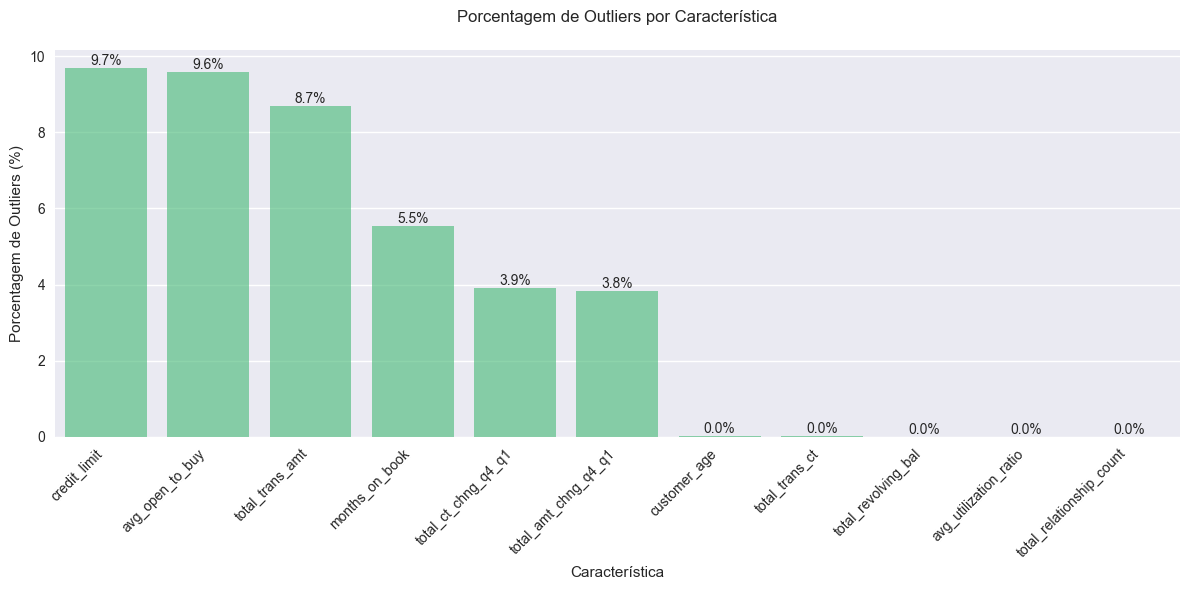

In [15]:
# Analisa outliers
df_outliers = check_outliers(train, categoria_numericas)

# Visualiza√ß√£o dos resultados
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_outliers,
    x='caracteristica',
    y='pct_outliers',
    color='#2ecc71',
    alpha=0.6
)

plt.title('Porcentagem de Outliers por Caracter√≠stica', pad=20)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Caracter√≠stica')
plt.ylabel('Porcentagem de Outliers (%)')

# Adiciona valores nas barras
for i, v in enumerate(df_outliers['pct_outliers']):
    plt.text(i, v, f'{v:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()



As propor√ß√µes de outliers s√£o baixas em cada categoria. Al√©m disso, uma vez que n√£o representam informa√ß√µes inconsistentes como erros de medi√ß√£o, n√£o as removerei.

### **Distribui√ß√£o das Vari√°veis Categ√≥ricas**  

Agora, analisarei a **distribui√ß√£o das vari√°veis categ√≥ricas** para entender:  
- **As caracter√≠sticas mais comuns dos clientes do banco**.  
- **Padr√µes que possam indicar tend√™ncias de churn**.  

Al√©m disso, incluirei **algumas vari√°veis discretas** nos gr√°ficos, pois ser√° mais f√°cil visualiz√°-las utilizando **gr√°ficos de contagem (countplot)**.

In [16]:
barplot_discrete_features = ['gender', 
                             'dependent_count', 
                             'months_inactive_12_mon', 
                             'contacts_count_12_mon']
barplot_features = barplot_discrete_features + variaveis_categoricas
print(barplot_features)

['gender', 'dependent_count', 'months_inactive_12_mon', 'contacts_count_12_mon', 'education_level', 'marital_status', 'income_category', 'card_category']


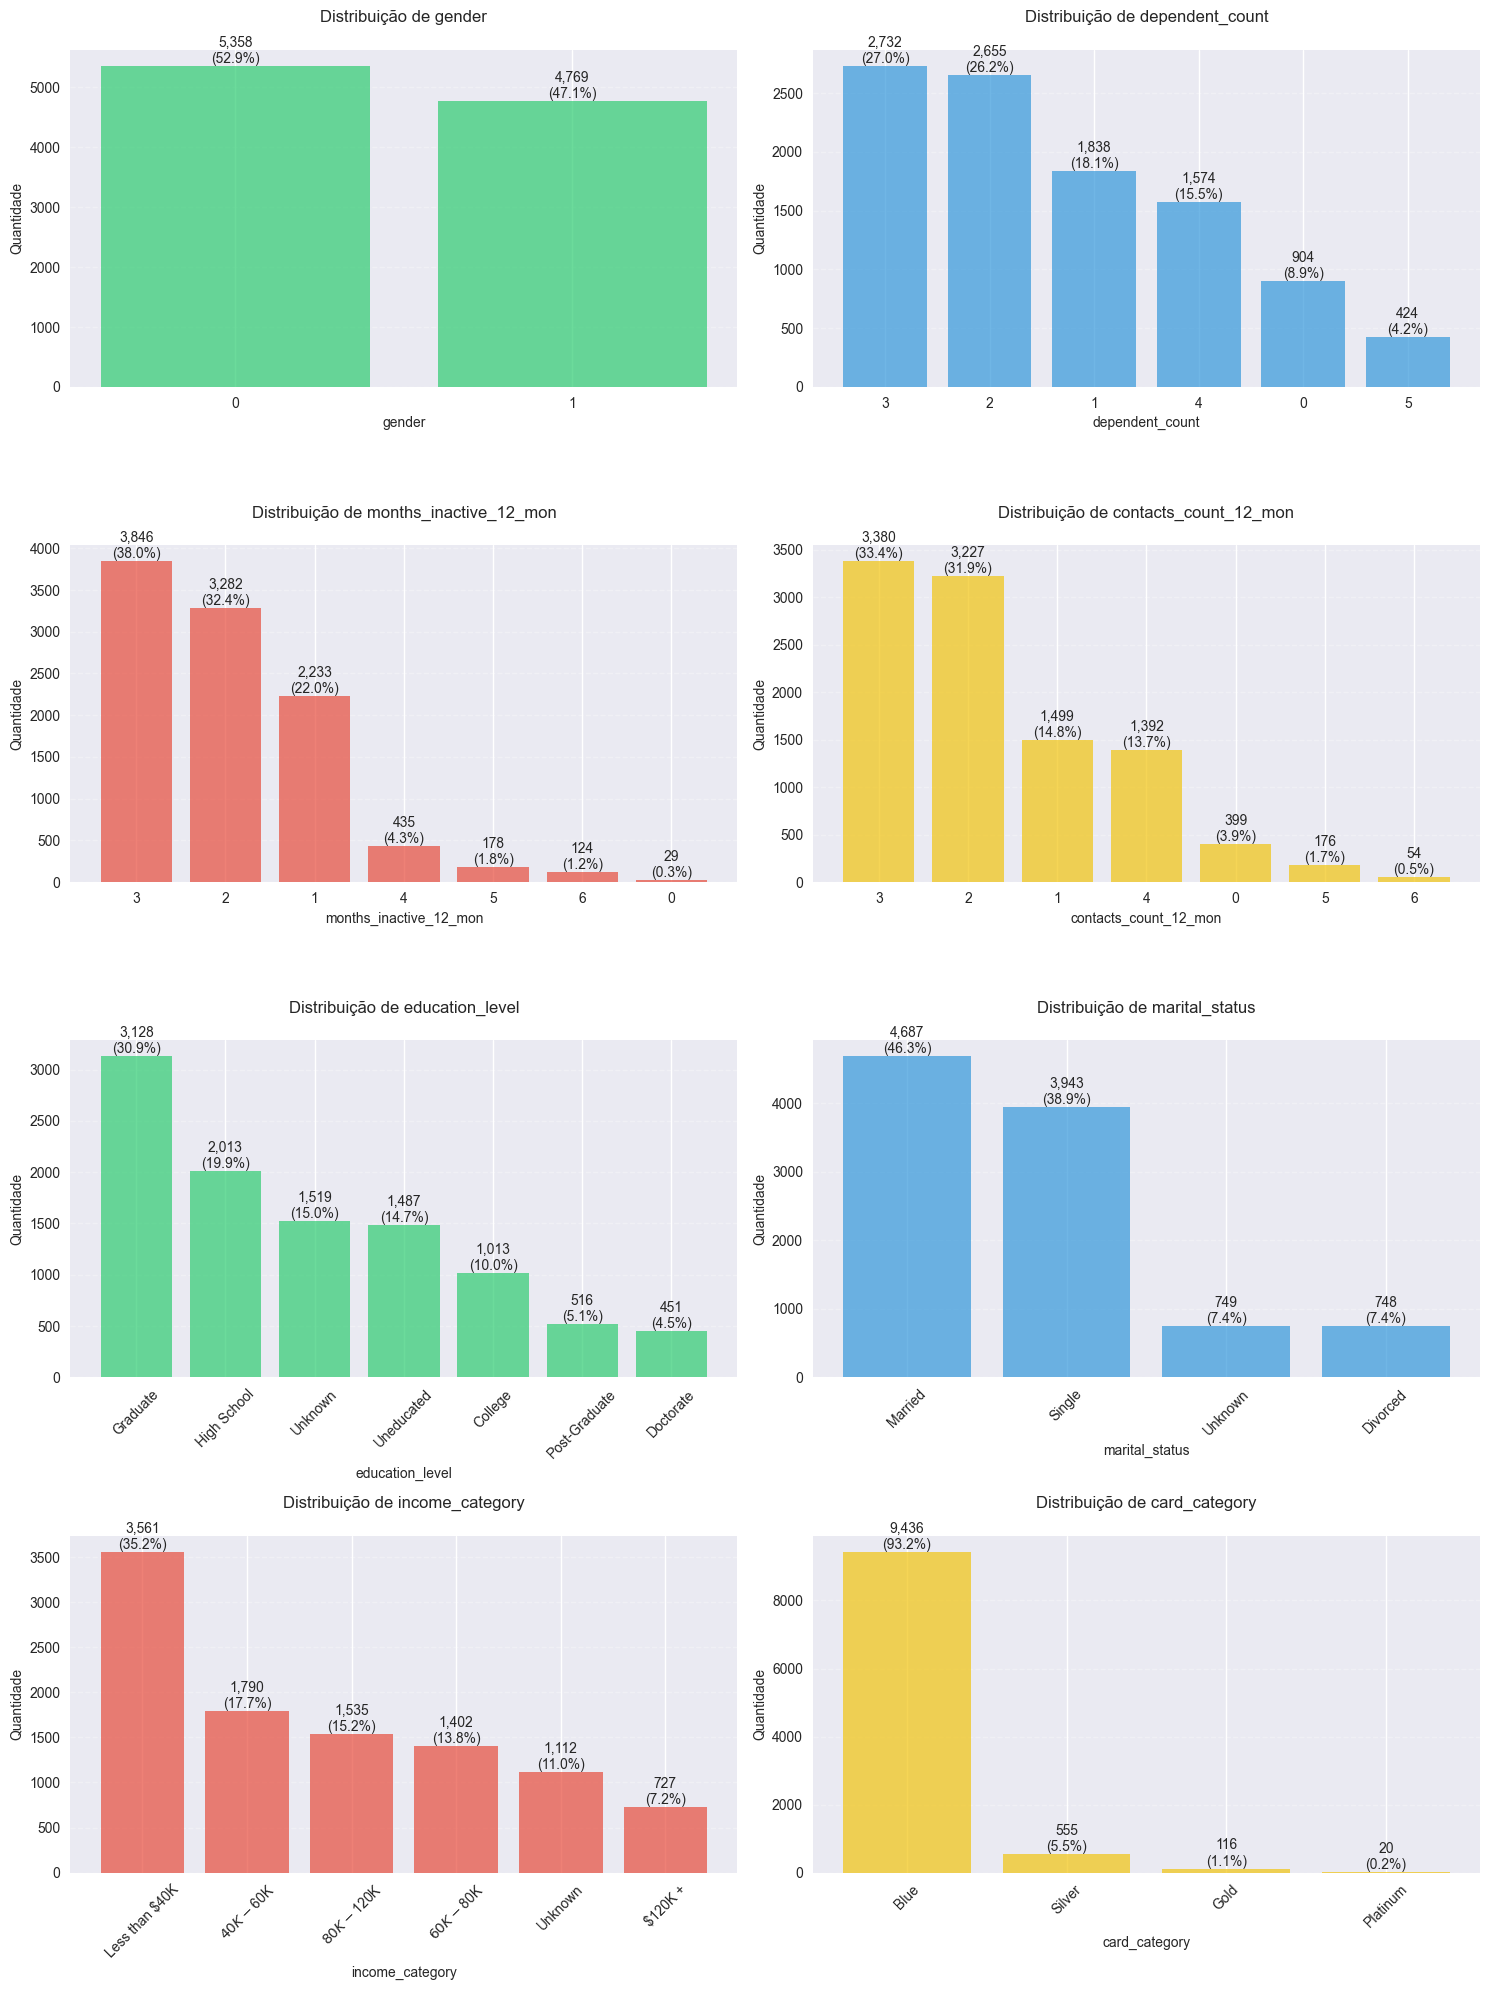

In [21]:
def plotar_distribuicao_barras(df, features):
    """
    Cria gr√°ficos de barra mostrando a distribui√ß√£o das caracter√≠sticas selecionadas.
    
    Par√¢metros:
    - df: DataFrame com os dados
    - features: Lista de caracter√≠sticas para an√°lise
    """
    # Configura√ß√µes do plot
    n_features = len(features)
    n_cols = 2
    n_rows = (n_features + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    
    # Configura√ß√£o do estilo
    plt.style.use('seaborn')
    cores = ['#2ecc71', '#3498db', '#e74c3c', '#f1c40f']
    
    for idx, feature in enumerate(features):
        row = idx // n_cols
        col = idx % n_cols
        
        # Calcula as contagens e percentuais
        contagem = df[feature].value_counts()
        percentual = (contagem / len(df) * 100).round(1)
        
        # Cria o gr√°fico de barras
        ax = axes[row, col]
        barras = ax.bar(contagem.index.astype(str), 
                       contagem.values,
                       color=cores[idx % len(cores)],
                       alpha=0.7)
        
        # Adiciona r√≥tulos e t√≠tulos
        ax.set_title(f'Distribui√ß√£o de {feature}', pad=20, fontsize=12)
        ax.set_xlabel(feature, fontsize=10)
        ax.set_ylabel('Quantidade', fontsize=10)
        
        # Adiciona valores nas barras
        for barra, valor, pct in zip(barras, contagem.values, percentual):
            ax.text(barra.get_x() + barra.get_width()/2,
                   valor,
                   f'{valor:,}\n({pct}%)',
                   ha='center',
                   va='bottom')
        
        # Remove bordas desnecess√°rias
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        
        # Adiciona grid suave
        ax.yaxis.grid(True, linestyle='--', alpha=0.3)
        
        # Rotaciona labels se necess√°rio
        if max([len(str(x)) for x in contagem.index]) > 3:
            ax.tick_params(axis='x', rotation=45)
    
    # Remove subplots vazios se houver
    if n_features % n_cols != 0:
        for idx in range(n_features, n_rows * n_cols):
            fig.delaxes(axes[idx // n_cols, idx % n_cols])
    
    plt.tight_layout()
    plt.show()

# Features para an√°lise


# Gera o gr√°fico
plotar_distribuicao_barras(df, barplot_features)

### **Insights:**  

- **G√™nero:** **Quase 53%** dos clientes s√£o **mulheres**.  
- **Dependentes:** **Mais de 50%** dos clientes t√™m **2 ou 3 dependentes**.  
- **Inatividade:**  
  - **90%** dos clientes ficaram **inativos de 1 a 3 meses** no √∫ltimo ano.  
  - O banco deve implementar **estrat√©gias para aumentar a taxa de utiliza√ß√£o** e **reduzir a inatividade**.  
- **Contato com o banco:**  
  - **65%** dos clientes entraram em contato **2 ou 3 vezes** no √∫ltimo ano.  
- **Perfil geral:**  
  - A maioria dos clientes √© **casada ou solteira**.  
  - A maioria possui **ensino superior completo**.  
  - **Ganham menos de $40K** por ano.  
  - **Possuem o cart√£o de cr√©dito Blue**.  
- **Distribui√ß√£o desbalanceada em algumas vari√°veis:**  
  - Algumas categorias possuem **propor√ß√µes extremamente baixas** de observa√ß√µes, como **0 meses de inatividade** e **6 contatos no √∫ltimo ano**.  
  - A vari√°vel **card_category** √© **altamente desbalanceada**:  
    - **Quase 99%** dos clientes possuem cart√µes **Blue ou Silver**.  
    - O cart√£o **Blue corresponde a 93,3%** dos clientes.  
  - Isso ser√° considerado na **etapa de modelagem**, pois:  
    - Categorias com **propor√ß√£o extremamente baixa** podem levar a **overfitting**.  
    - **Card_category pode n√£o ter poder discriminativo** para prever churn.  

---

### **An√°lise Bivariada e Multivariada**  
Agora, realizarei **an√°lises bivariadas e multivariadas** para investigar:  
- **Rela√ß√µes entre as vari√°veis**.  
- **Rela√ß√£o das vari√°veis com o churn_flag**.  

---

### **Matriz de Correla√ß√£o**  
Vou examinar a **matriz de correla√ß√£o** para:  
- Identificar **rela√ß√µes lineares** entre as vari√°veis.  
- Verificar **for√ßa e dire√ß√£o** dessas rela√ß√µes, principalmente com a vari√°vel-alvo (**churn_flag**).

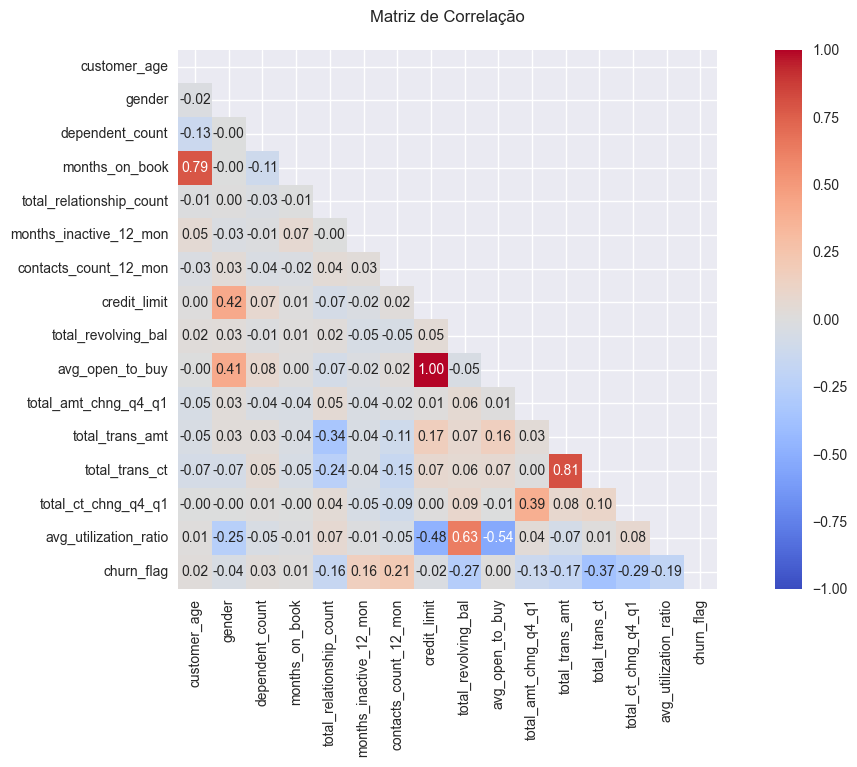

In [33]:
corr_matrix = train.corr(numeric_only=True)
plt.figure(figsize=(15, 7))
mask = np.triu(np.ones_like(train.corr(numeric_only=True), dtype=bool))
sns.heatmap(corr_matrix, 
            mask=mask,  # aplica a m√°scara
            vmin=-1, 
            vmax=1, 
            annot=True,  # mostra os valores
            cmap='coolwarm',  # esquema de cores
            center=0,  # centraliza o colormap em 0
            square=True,  # c√©lulas quadradas
            fmt='.2f')  # formato dos n√∫meros (2 casas decimais)
plt.title('Matriz de Correla√ß√£o', pad=20)

plt.show()

### **Insights:**  

- **Correla√ß√£o com Churn:**  
  - **Total_Trans_Ct, Total_Revolving_Bal e Total_Ct_Chng_Q4_Q1** t√™m **correla√ß√£o negativa moderada** com churn.  
  - Faz sentido: **quanto menos transa√ß√µes o cliente faz, maior a probabilidade de churn**.  
  - Clientes com **menor saldo rotativo e menor varia√ß√£o no n√∫mero de transa√ß√µes tendem a abandonar o servi√ßo**.  

- **Idade x Tempo de Relacionamento:**  
  - **Idade do cliente e Months_on_book s√£o fortemente correlacionados positivamente**.  
  - **Clientes mais velhos tendem a permanecer mais tempo no banco**.  
  - O banco deve **reter clientes antigos leais** e **aumentar a fidelidade dos clientes mais jovens**.  

- **Cr√©dito e Utiliza√ß√£o:**  
  - **Credit_Limit e Avg_Utilization_Ratio t√™m correla√ß√£o negativa moderada**.  
  - Ou seja, **quanto maior o limite de cr√©dito, menor a taxa de utiliza√ß√£o m√©dia**.  
  - **Total_Revolving_Bal e Avg_Utilization_Ratio t√™m correla√ß√£o positiva forte**.  
  - Clientes que **utilizam mais o cart√£o de cr√©dito acumulam saldos rotativos maiores**.  

- **Diferen√ßas de G√™nero:**  
  - **G√™nero tem correla√ß√£o moderada positiva com Credit_Limit**.  
  - **Homens tendem a ter limites de cr√©dito mais altos que mulheres**.  

- **Multicolinearidade:**  
  - Algumas vari√°veis t√™m **correla√ß√µes muito altas**, como **Total_Trans_Amt e Total_Trans_Ct**.  
  - Isso pode gerar **problemas de multicolinearidade em modelos lineares**.  
  - Como **o foco √© predi√ß√£o com algoritmos robustos (ex: LightGBM)**, n√£o √© uma preocupa√ß√£o imediata.  

- **Vari√°veis Redundantes:**  
  - **Avg_Open_To_Buy e Credit_Limit s√£o perfeitamente correlacionadas** (**correla√ß√£o = 1**).  
  - Isso ocorre porque **open_to_buy** representa o **valor dispon√≠vel**, enquanto **credit_limit** representa o **limite total**.  
  - **Avg_Open_To_Buy ser√° removida na etapa de modelagem, pois Credit_Limit √© mais informativa**.

### Distribui√ß√µes de categorias num√©ricas por rotatividade

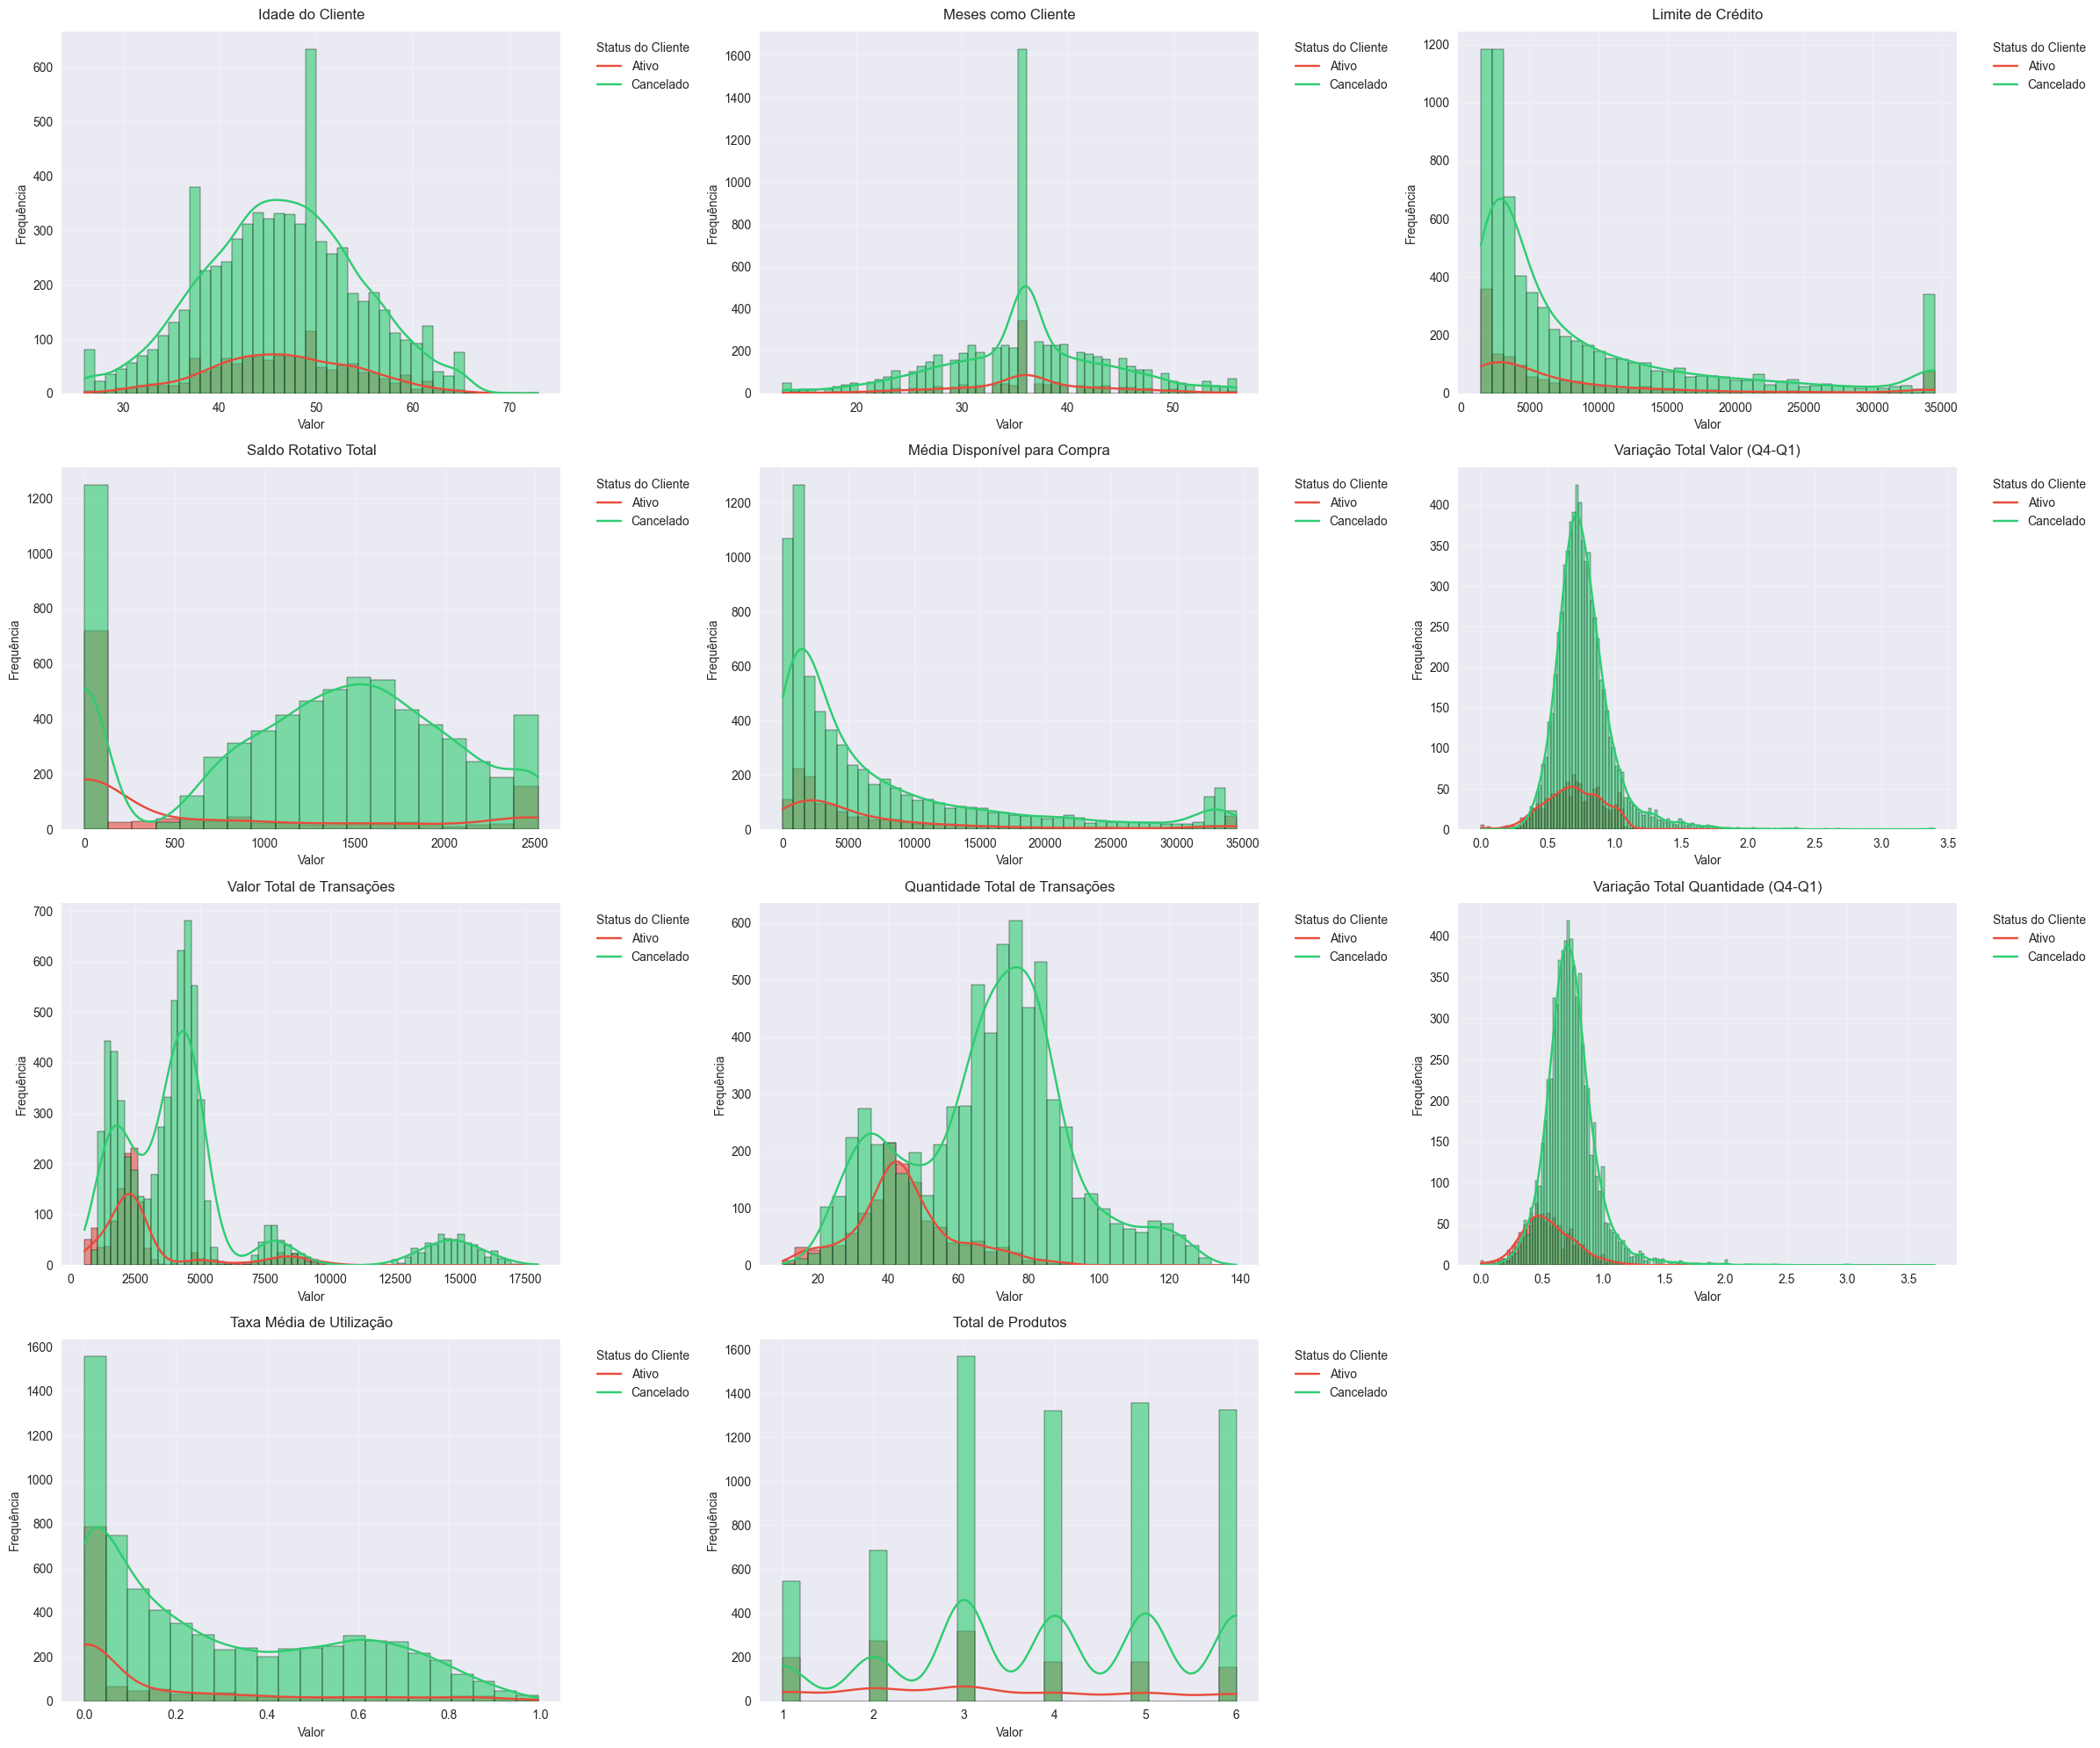

In [24]:
plotar_analise(train,categoria_numericas, hue='churn_flag')

### Vari√°veis categ√≥ricas x Churn


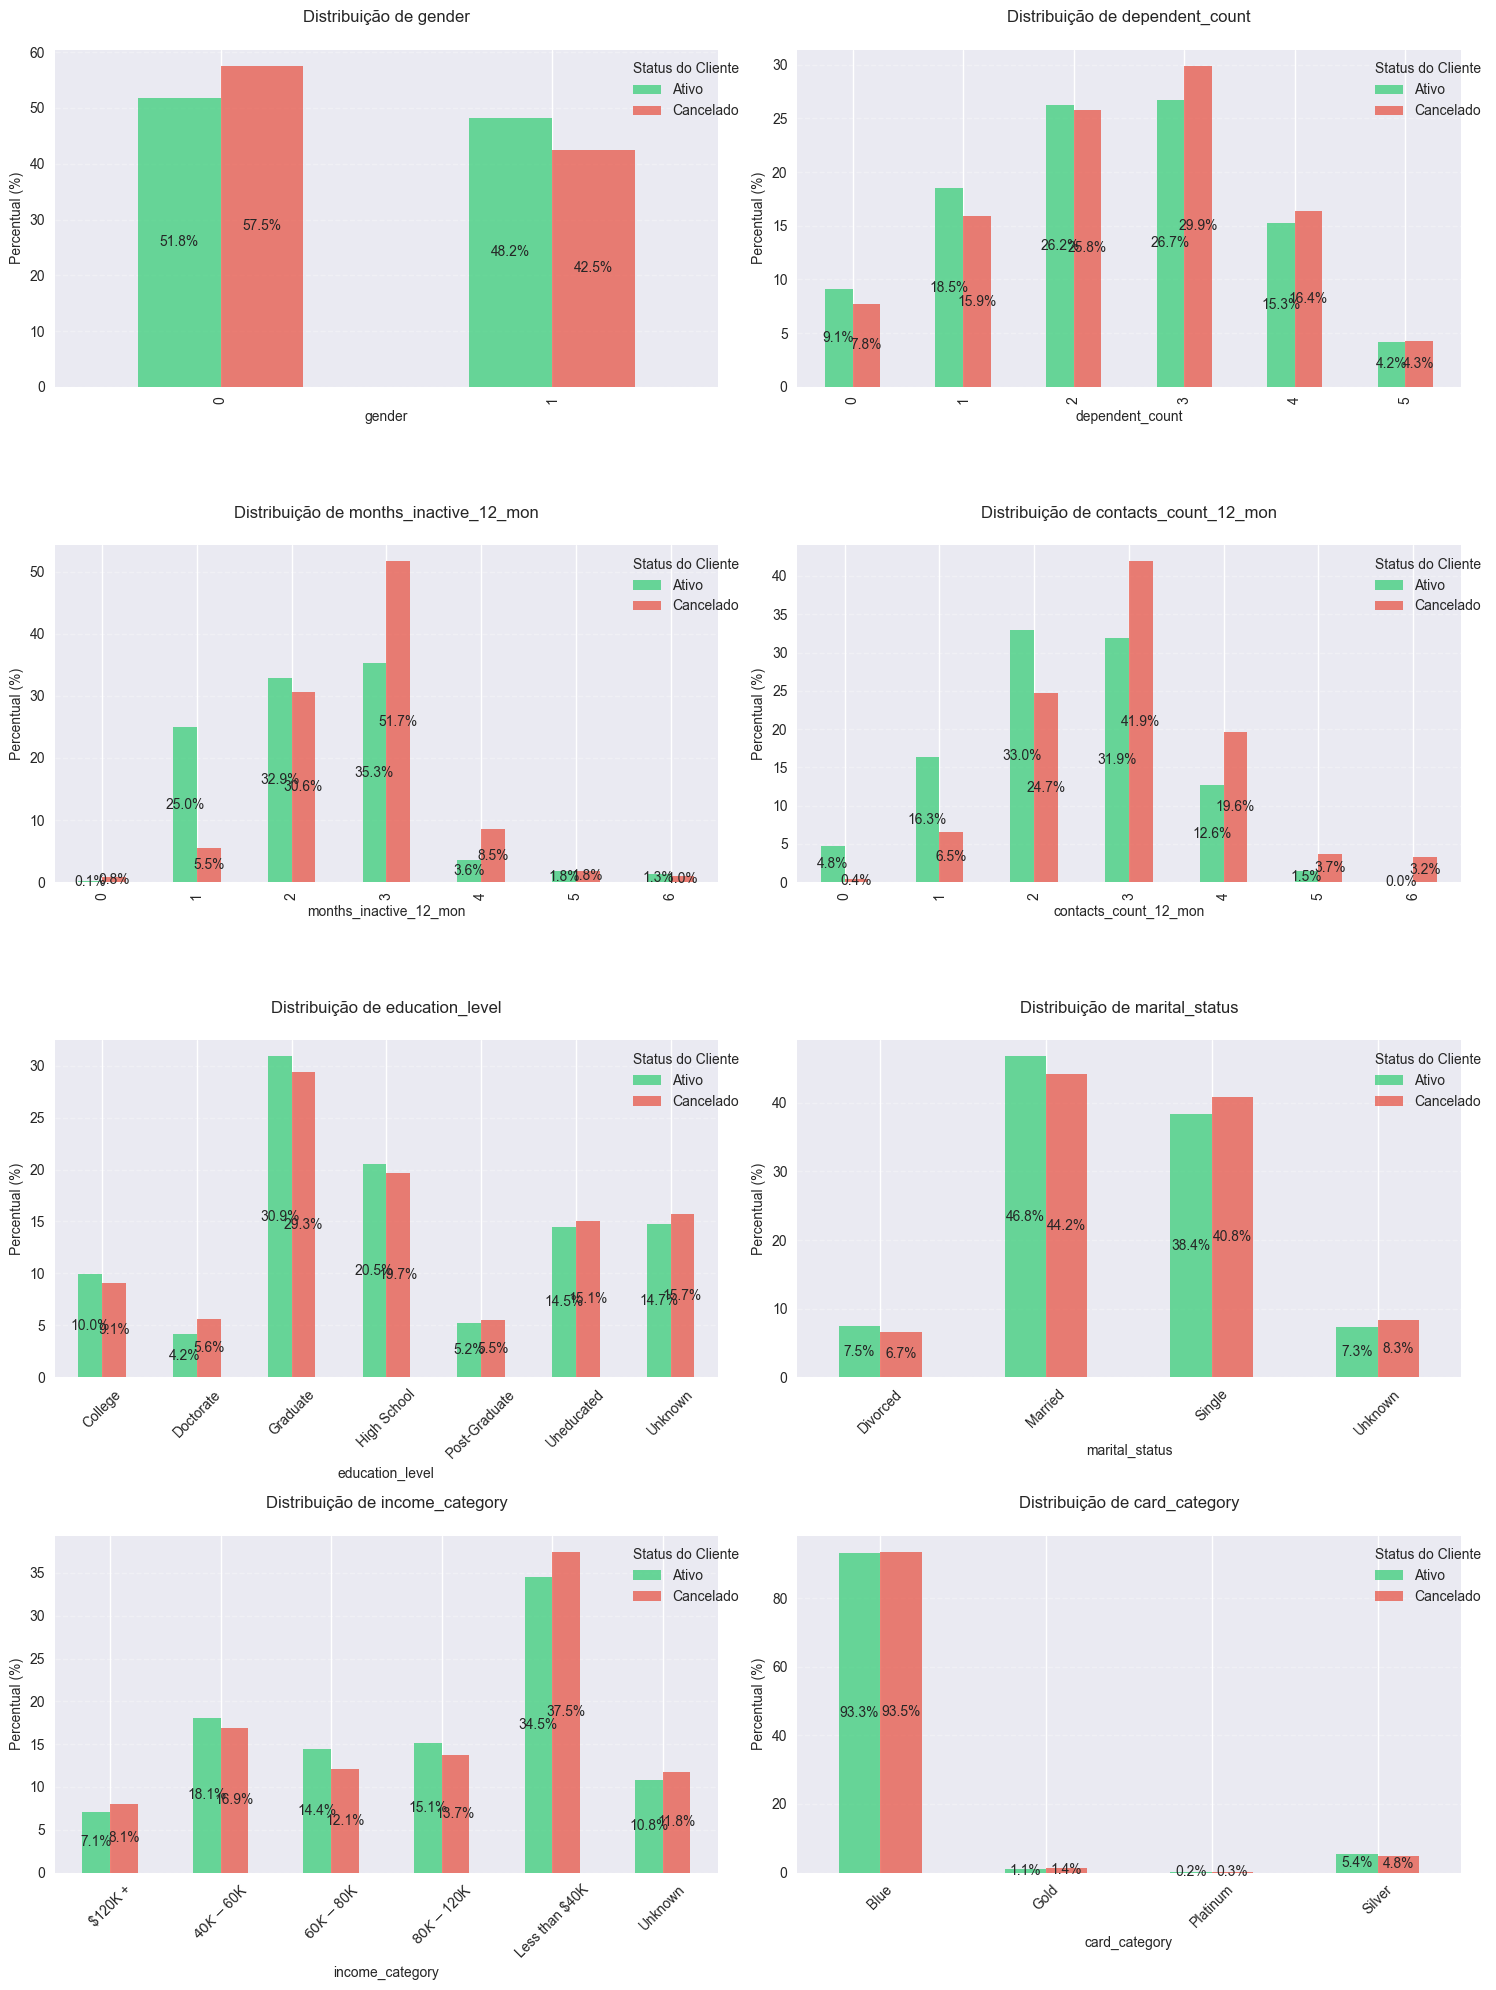

In [23]:
def plotar_distribuicao_barras(df, features, hue=None):
    """
    Cria gr√°ficos de barra mostrando a distribui√ß√£o das caracter√≠sticas selecionadas.
    
    Par√¢metros:
    - df: DataFrame com os dados
    - features: Lista de caracter√≠sticas para an√°lise
    - hue: Nome da coluna para segmentar os dados (opcional)
    """
    # Configura√ß√µes do plot
    n_features = len(features)
    n_cols = 2
    n_rows = (n_features + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    
    # Configura√ß√£o do estilo
    plt.style.use('seaborn')
    cores = ['#2ecc71', '#e74c3c']  # Verde para n√£o-churn, vermelho para churn
    
    for idx, feature in enumerate(features):
        row = idx // n_cols
        col = idx % n_cols
        ax = axes[row, col]
        
        # Calcula as contagens por grupo
        contagem = pd.crosstab(df[feature], df[hue], normalize='columns') * 100
        
        # Cria o gr√°fico de barras empilhadas
        contagem.plot(kind='bar', 
                    ax=ax,
                    color=cores,
                    alpha=0.7)
        
        # Adiciona r√≥tulos nas barras
        for container in ax.containers:
            ax.bar_label(container, fmt='%.1f%%', label_type='center')
        
        # Configura a legenda
        ax.legend(title='Status do Cliente',
                    labels=['Ativo', 'Cancelado'],
                    bbox_to_anchor=(1.05, 1))
            
       
        # Configura√ß√µes comuns
        ax.set_title(f'Distribui√ß√£o de {feature}', pad=20, fontsize=12)
        ax.set_xlabel(feature, fontsize=10)
        ax.set_ylabel('Percentual (%)' if hue else 'Quantidade', fontsize=10)
        
        # Remove bordas desnecess√°rias
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        
        # Adiciona grid suave
        ax.yaxis.grid(True, linestyle='--', alpha=0.3)
        
        # Rotaciona labels se necess√°rio
        if max([len(str(x)) for x in df[feature].unique()]) > 3:
            ax.tick_params(axis='x', rotation=45)
    
    # Remove subplots vazios se houver
    if n_features % n_cols != 0:
        for idx in range(n_features, n_rows * n_cols):
            fig.delaxes(axes[idx // n_cols, idx % n_cols])
    
    plt.tight_layout()
    plt.show()


plotar_distribuicao_barras(train, barplot_features, hue='churn_flag')

### **Insights:**  

- **N√∫mero de Contatos e Churn:**  
  - O churn **aumenta consistentemente** √† medida que **o n√∫mero de contatos com o banco cresce**.  
  - **Todos os clientes que fizeram 6 contatos churnaram**.  

- **"Unknown" como Categoria Informativa:**  
  - Em **Marital_Status**, a categoria **"Unknown" tem a maior taxa de churn**.  
  - Em **Education_Level e Income_Category**, **"Unknown" tem a segunda maior taxa de churn**.  
  - **Remov√™-la introduziria perda de informa√ß√£o e vi√©s**.  
  - **Decis√£o:** Manter **"Unknown" como uma categoria v√°lida** no pr√©-processamento.  

- **Churn e Categoria do Cart√£o:**  
  - Apesar de **Card_Category ser altamente desbalanceada (93.3% Blue)**, o churn **varia entre as categorias**.  
  - **Platinum apresenta a maior taxa de churn**.  
  - Mesmo tendo **poucas observa√ß√µes**, pode ser **importante para a predi√ß√£o**.  
  - **Decis√£o:** Manter e avaliar import√¢ncia da vari√°vel no modelo (ex: via feature importance do LightGBM).  

- **G√™nero e Churn:**  
  - **Mulheres apresentam maior taxa de churn do que homens**.  

- **Clientes Sempre Ativos e Churn:**  
  - **Clientes que nunca ficaram inativos nos √∫ltimos 12 meses t√™m a maior taxa de churn**.  
  - **Isto √© contraintuitivo** e pode indicar que esses clientes **estavam ativos apenas para encerrar a conta**.  

- **N√≠vel Educacional e Churn:**  
  - **Clientes com doutorado apresentam a maior taxa de churn** entre os n√≠veis educacionais.

### **Conclus√µes da An√°lise Explorat√≥ria (EDA)**  

#### **Principais Insights:**  

1Ô∏è‚É£ **Baixa Utiliza√ß√£o do Servi√ßo**  
   - O **average utilization ratio** √© **assim√©trico √† direita** ‚Üí **a maioria dos clientes utiliza pouco o servi√ßo**.  
   - **25%** dos clientes t√™m **utiliza√ß√£o zero** ‚Üí Estrat√©gias para **incentivar o uso do cart√£o s√£o essenciais**.  

2Ô∏è‚É£ **Alta Inatividade dos Clientes**  
   - **90% dos clientes ficaram inativos de 1 a 3 meses no √∫ltimo ano**.  
   - Al√©m de aumentar a utiliza√ß√£o, o banco deve **reduzir per√≠odos de inatividade**.  

3Ô∏è‚É£ **Muitos Clientes Entram em Contato**  
   - **75% dos clientes contataram o banco pelo menos 2 vezes no √∫ltimo ano**.  
   - O banco precisa entender **os motivos** dessas chamadas ‚Üí **Insatisfa√ß√£o com o servi√ßo? Problemas recorrentes?**  

4Ô∏è‚É£ **Idade e Tempo de Relacionamento com o Banco**  
   - **Clientes mais velhos permanecem mais tempo usando os servi√ßos** ‚Üí Forte correla√ß√£o positiva entre **age e months on book**.  
   - **Foco em reten√ß√£o de clientes mais antigos** e **aumento do tempo de relacionamento dos mais jovens**.  

5Ô∏è‚É£ **Limite de Cr√©dito vs. Utiliza√ß√£o**  
   - **Correla√ß√£o negativa exponencial** ‚Üí Quanto **maior o limite de cr√©dito, menor a taxa de utiliza√ß√£o**.  
   - Clientes com **limites altos usam menos o cart√£o**.  

6Ô∏è‚É£ **Padr√£o dos Clientes que Churnam**  
   - Clientes que churnam apresentam:  
     - **Menores limites de cr√©dito**  
     - **Menores saldos rotativos**  
     - **Menores valores e quantidades de transa√ß√µes**  
     - **Menores varia√ß√µes na quantidade de transa√ß√µes**  
     - **Menores taxas de utiliza√ß√£o (muitos com zero utiliza√ß√£o)**  
   - **Isso faz sentido**, pois clientes propensos ao churn **reduzem o uso antes de cancelar o servi√ßo**.  

7Ô∏è‚É£ **N√∫mero de Contatos e Churn**  
   - **Churn aumenta conforme os clientes entram em contato**.  
   - **Todos os clientes que ligaram 6 vezes churnaram** ‚Üí Algo cr√≠tico est√° acontecendo com esses clientes.  
   - **Clientes com doutorado tamb√©m t√™m maior taxa de churn**.  

üìå **Pr√≥ximo Passo:** Considerar esses insights no **pr√©-processamento e modelagem preditiva** para prever e reduzir o churn.